<a href="https://colab.research.google.com/github/ebuillent13yadav/scikit-notes/blob/main/scikit_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Finding negative and positive comments.

## Data Class

In [15]:
class Sentiments:
  NEGATIVE = "NEGATIVE"
  NEUTRAL = "NEUTRAL"
  POSITIVE = "POSITIVE"

class Review:

  def __init__(self, text, score):
    self.text = text
    self.score = score
    self.sentiment = self.get_sentiment()

  def get_sentiment(self):
    if (self.score <= 2):
      return Sentiments.NEGATIVE
    elif (self.score == 3):
      return Sentiments.NEUTRAL
    else: # score of 4 or 5
      return Sentiments.POSITIVE

## Our data set

In [17]:
file_name = "./Books_small.json"

reviews = []

with open(file_name) as f:
  for line in f:
    review = json.loads(line)
    reviews.append(Review(review['reviewText'], review['overall']))

reviews[5].text

'Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!'

## Converting text to numericals

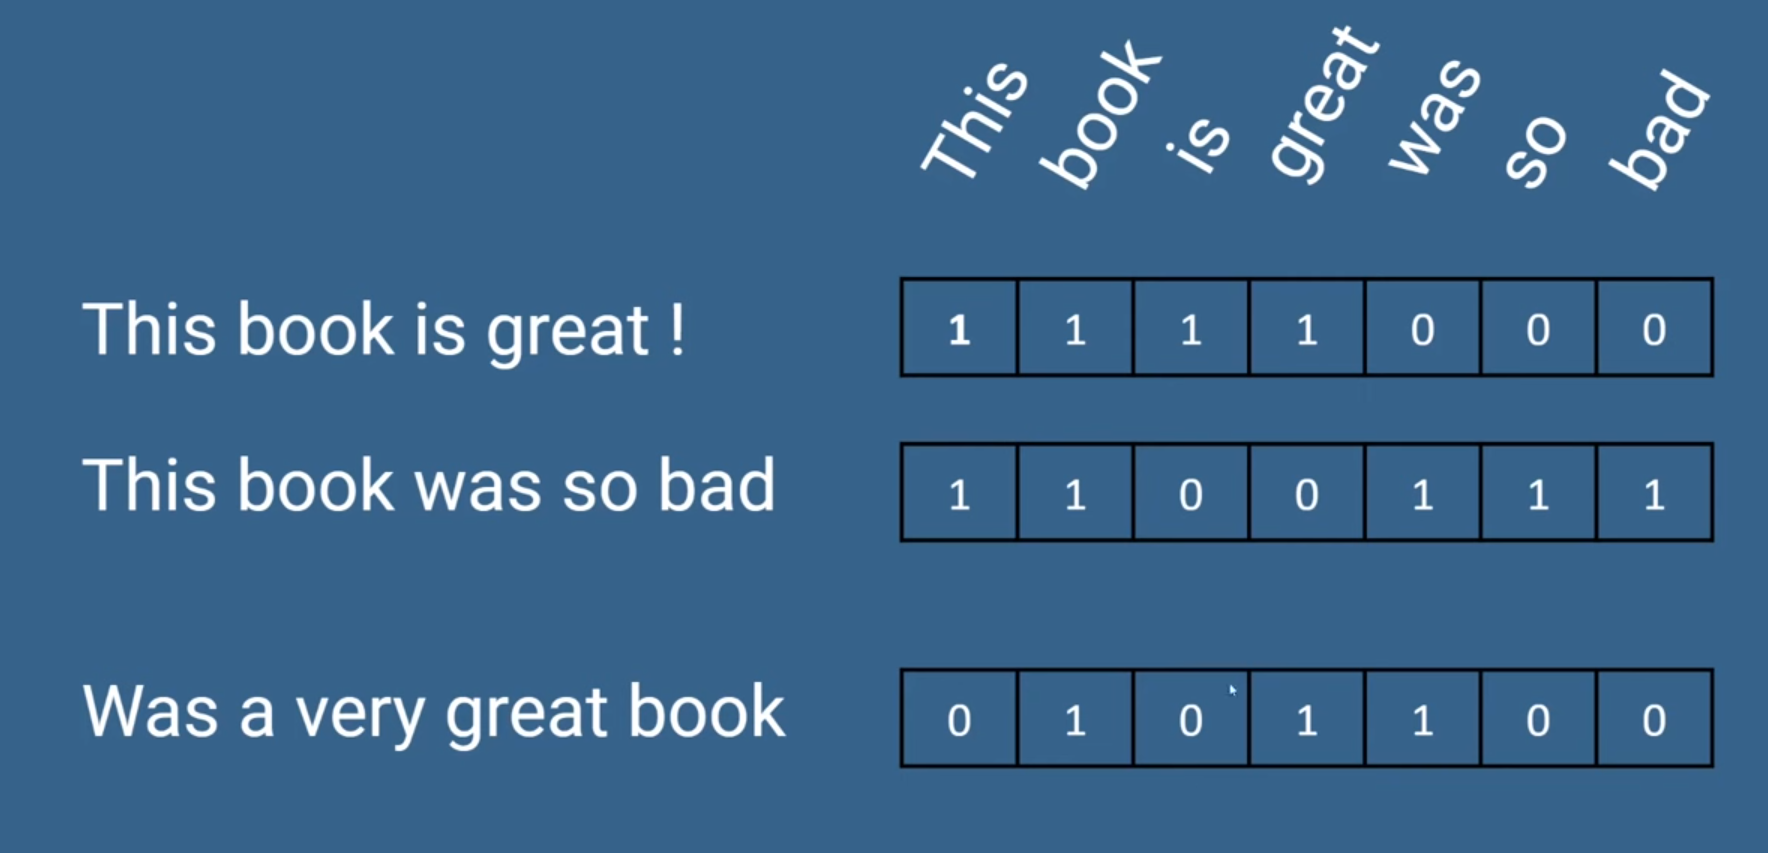

## Prep Data

In [20]:
training, test = train_test_split(reviews, test_size=0.33, random_state=42)

In [35]:
train_x = [x.text for x in training]
train_y = [x.sentiment for x in training]

test_x = [x.text for x in test]
test_y = [x.sentiment for x in test]

## Bag of words vectorization

In [46]:
vectorizer = CountVectorizer()

#train_x_vectors = vectorizer.fit_transform(train_x)

vectorizer.fit(train_x)
train_x_vectors = vectorizer.transform(train_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

Vivid characters and descriptions. The author has created a tale that grabs your attention and I couldn't put it down.
[[0 0 0 ... 0 0 0]]


So now our final data is train_x_vectors and train_y

## Classification